> Pandas数据预处理
> - Written by leiding
>> - example_data.csv：处理异常值示例
>> - scores.xlsx：案例—读取北京市2006~2018年高考分数线表格信息及分析
>> - beijing.csv, tianjin.csv：案例—预处理部分地区信息
>> - Python数据分析与应用,黑马程序员,3.8节,4.5节

# 1 数据清洗

In [1]:
import numpy as np
import pandas as pd

## 1.1 处理缺失值

In [2]:
obj = pd.Series([1, np.nan, 3.5, np.nan, 7])
print(obj, '\n')
print(pd.isnull(obj), '\n')
print(obj.dropna(), '\n')
obj.fillna(99)

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64 

0    False
1     True
2    False
3     True
4    False
dtype: bool 

0    1.0
2    3.5
4    7.0
dtype: float64 



0     1.0
1    99.0
2     3.5
3    99.0
4     7.0
dtype: float64

In [3]:
frame = pd.DataFrame([[1., 6.5, 3.], [2., np.nan, np.nan],
                      [None, np.nan, pd.NA], [pd.NaT, 7.1, 4.]],
                     index=list('bcda'), columns=list('ABC'))
print(frame, '\n')
print(pd.isnull(frame), '\n')
print(frame.dropna(), '\n')
print(frame.dropna(how='any', thresh=2), '\n')
print(frame.fillna(99), '\n')
print(frame.fillna({'A': 66, 'C': 77}), '\n')
print(frame.fillna(method='ffill'))

      A    B     C
b   1.0  6.5   3.0
c   2.0  NaN   NaN
d  None  NaN  <NA>
a   NaT  7.1   4.0 

       A      B      C
b  False  False  False
c  False   True   True
d   True   True   True
a   True  False  False 

     A    B    C
b  1.0  6.5  3.0 

     A    B    C
b  1.0  6.5  3.0
a  NaT  7.1  4.0 

      A     B     C
b   1.0   6.5   3.0
c   2.0  99.0  99.0
d  99.0  99.0  99.0
a  99.0   7.1   4.0 

      A    B     C
b   1.0  6.5   3.0
c   2.0  NaN  77.0
d  66.0  NaN  77.0
a  66.0  7.1   4.0 

     A    B    C
b  1.0  6.5  3.0
c  2.0  6.5  3.0
d  2.0  6.5  3.0
a  2.0  7.1  4.0


## 1.2 处理重复值

In [4]:
animals = pd.Series(['lama', 'cow', 'lama', 'bettle', 'lama'])
print(animals.duplicated(), '\n')
animals.drop_duplicates(keep='last')

0    False
1    False
2     True
3    False
4     True
dtype: bool 



1       cow
3    bettle
4      lama
dtype: object

In [5]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                    'k2': [1, 1, 2, 3, 3, 4, 4]})
print(data, '\n')
print(data.duplicated(), '\n')
print(data.drop_duplicates(), '\n')
print(data.drop_duplicates(keep='last'), '\n')
print(data.drop_duplicates(['k2']))

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4
6  two   4 

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool 

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4 

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
6  two   4 

    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4


## 1.3 处理异常值

In [6]:
def three_sigma(ser1): 
    # 求平均值
    mean_value = ser1.mean()
    # 求标准差
    std_value = ser1.std()
    # 位于(μ-3σ,μ+3σ)区间的数据是正常的，不在这个区间的数据为异常的
    # ser1中的数值小于μ-3σ或大于μ+3σ均为异常值
    # 一旦发现有异常值，就标注为True，否则标注为False
    rule = (mean_value - 3 * std_value > ser1) | (ser1.mean() + 3 * ser1.std() < ser1)
    # 返回异常值的位置索引
    index = np.arange(ser1.shape[0])[rule]
    # 获取异常数据
    outrange = ser1.iloc[index]
    return outrange
df = pd.read_csv('example_data.csv')
df

,A,B
0,1,2
1,2,3
2,3,8
3,4,5
4,5,6
5,560,7
6,2,8
7,3,9
8,3,0
9,4,3


In [7]:
print(three_sigma(df['A']), '\n')
print(three_sigma(df['B']))

5    560
Name: A, dtype: int64 

Series([], Name: B, dtype: int64)


In [8]:
#替代值
data = pd.Series([1., -999, 2., -999., -1000, 3.])
data = pd.DataFrame({'A': data, 'B': data})
print(data, '\n')
print(data.replace(-999, np.nan), '\n')
print(data.replace([-999, -1000], np.nan), '\n')
print(data.replace({-999: np.nan, -1000: 0}))

        A       B
0     1.0     1.0
1  -999.0  -999.0
2     2.0     2.0
3  -999.0  -999.0
4 -1000.0 -1000.0
5     3.0     3.0 

        A       B
0     1.0     1.0
1     NaN     NaN
2     2.0     2.0
3     NaN     NaN
4 -1000.0 -1000.0
5     3.0     3.0 

     A    B
0  1.0  1.0
1  NaN  NaN
2  2.0  2.0
3  NaN  NaN
4  NaN  NaN
5  3.0  3.0 

     A    B
0  1.0  1.0
1  NaN  NaN
2  2.0  2.0
3  NaN  NaN
4  0.0  0.0
5  3.0  3.0


## 1.4 更改数据类型

In [9]:
df = pd.DataFrame({'A': [1, 1.2, 4.2],
                  'B': ['-9', '70', '88'],
                  'C': ['x', '5.0', '0']})
print(df.dtypes, '\n')
df['B'].astype(dtype='int')

A    float64
B     object
C     object
dtype: object 



0    -9
1    70
2    88
Name: B, dtype: int32

In [10]:
print(pd.to_numeric(df['B']), '\n')
pd.to_numeric(df['C'], errors='coerce')

0    -9
1    70
2    88
Name: B, dtype: int64 



0    NaN
1    5.0
2    0.0
Name: C, dtype: float64

# 2 数据转换

## 2.1 重命名轴索引

In [11]:
data = pd.DataFrame(np.arange(12).reshape(3, 4),
                    index=['BEIJING', 'SHANGHAI', 'GUANGZHOU'],
                    columns=['one', 'two', 'three', 'four'])
print(data, '\n')
print(data.rename(index={'BEIJING': 'A'}, columns={'four': 'last'}), '\n')

           one  two  three  four
BEIJING      0    1      2     3
SHANGHAI     4    5      6     7
GUANGZHOU    8    9     10    11 

           one  two  three  last
A            0    1      2     3
SHANGHAI     4    5      6     7
GUANGZHOU    8    9     10    11 



In [12]:
print(data.rename(index=str.title, columns=str.upper), '\n')
data.rename(str.lower, axis='columns')

           ONE  TWO  THREE  FOUR
Beijing      0    1      2     3
Shanghai     4    5      6     7
Guangzhou    8    9     10    11 



,one,two,three,four
BEIJING,0,1,2,3
SHANGHAI,4,5,6,7
GUANGZHOU,8,9,10,11


In [13]:
data.index = list('abc')
data

,one,two,three,four
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


## 2.2 离散化和分箱

In [14]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 101]
bins = [0, 18, 25, 35, 60, 100]
cuts = pd.cut(ages, bins)
cuts

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (35.0, 60.0], (25.0, 35.0], (60.0, 100.0], (35.0, 60.0], NaN]
Length: 11
Categories (5, interval[int64, right]): [(0, 18] < (18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [15]:
type(cuts)

pandas.core.arrays.categorical.Categorical

In [16]:
cuts.codes

array([ 1,  1,  1,  2,  1,  1,  3,  2,  4,  3, -1], dtype=int8)

In [17]:
cuts.categories

IntervalIndex([(0, 18], (18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [18]:
pd.value_counts(cuts)

(18, 25]     5
(25, 35]     2
(35, 60]     2
(60, 100]    1
(0, 18]      0
dtype: int64

In [19]:
pd.cut(ages, [18, 26, 36, 61, 100],
       labels=['Youth', 'YoungAdult', 'MiddleAged', 'Senior'])

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'MiddleAged', 'YoungAdult', 'MiddleAged', 'MiddleAged', NaN]
Length: 11
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

## 2.3 虚拟变量

In [20]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                  'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [21]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [22]:
pd.get_dummies(df)

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [23]:
df2 = pd.DataFrame({'A': ['a', 'b', 'a'],
                   'B': ['b', 'c', 'a'],
                   'C': [1, 2, 3]})
pd.get_dummies(df2)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,0,0,1
2,3,1,0,1,0,0


In [24]:
pd.get_dummies(df2, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,0,0,1
2,3,1,0,1,0,0


In [25]:
# 给分箱设置虚拟变量
values = np.random.rand(10)
values

array([0.43934767, 0.10728912, 0.19089751, 0.79885958, 0.47190002,
       0.72943741, 0.48882312, 0.64604226, 0.92937144, 0.84060324])

In [26]:
pd.get_dummies(pd.cut(values, [0, 0.2, 0.4, 0.6, 0.8, 1]))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
5,0,0,0,1,0
6,0,0,1,0,0
7,0,0,0,1,0
8,0,0,0,0,1
9,0,0,0,0,1


# 3 数据合并

## 3.1 主键合并数据

In [27]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [28]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'], 'data2': range(5)})
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [29]:
pd.merge(df1, df2)
# pd.merge(df1, df2, on='key', how='inner')
# pd.merge(df1, df2, left_on='key', right_on='key', how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [30]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,0.0,3.0
2,b,1.0,1.0
3,b,1.0,3.0
4,b,5.0,1.0
5,b,5.0,3.0
6,a,2.0,0.0
7,a,2.0,2.0
8,a,4.0,0.0
9,a,4.0,2.0


In [31]:
pd.merge(df1, df2, how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [32]:
pd.merge(df1, df2, how='right')

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,b,0.0,1
3,b,1.0,1
4,b,5.0,1
5,a,2.0,2
6,a,4.0,2
7,b,0.0,3
8,b,1.0,3
9,b,5.0,3


In [33]:
# 使用多个键合并
df_left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                        'key2': ['one', 'two', 'one'],
                        'lval': [1, 2, 3]})
df_right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                         'key2': ['one', 'one', 'one', 'two'],
                         'rval': [4, 5, 6, 7]})
print(df_left, '\n')
print(df_right)
pd.merge(df_left, df_right, on=['key1', 'key2'], how='outer')

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3 

  key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7


,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [34]:
# 合并时重叠的列标签
pd.merge(df_left, df_right, on='key1')
# pd.merge(df_left, df_right, on='key1', suffixes=('_x', '_y'))

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


## 3.2 根据索引合并

In [35]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                   'value': range(6)})
print(left1, '\n')
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print(right1)
pd.merge(left1, right1, left_on='key', right_index=True)

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5 

   group_val
a        3.5
b        7.0


,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [36]:
pd.merge(left1, right1, left_index=True, right_index=True, how='outer')

,key,value,group_val
0,a,0.0,NaN
1,b,1.0,NaN
2,a,2.0,NaN
3,a,3.0,NaN
4,b,4.0,NaN
5,c,5.0,NaN
a,NaN,NaN,3.5
b,NaN,NaN,7.0


In [37]:
left2 = pd.DataFrame(np.arange(6).reshape(3, 2),
                    index=['a', 'c', 'e'], columns=['A', 'B'])
left2

,A,B
a,0,1
c,2,3
e,4,5


In [38]:
right2 = pd.DataFrame(np.arange(6, 14).reshape(4, 2),
                     index=['b', 'c', 'd', 'e'], columns=['C', 'D'])
right2

,C,D
b,6,7
c,8,9
d,10,11
e,12,13


In [39]:
pd.merge(left2, right2, left_index=True, right_index=True, how='outer')

,A,B,C,D
a,0.0,1.0,NaN,NaN
b,NaN,NaN,6.0,7.0
c,2.0,3.0,8.0,9.0
d,NaN,NaN,10.0,11.0
e,4.0,5.0,12.0,13.0


In [40]:
left2.join(right2, how='outer')

,A,B,C,D
a,0.0,1.0,NaN,NaN
b,NaN,NaN,6.0,7.0
c,2.0,3.0,8.0,9.0
d,NaN,NaN,10.0,11.0
e,4.0,5.0,12.0,13.0


In [41]:
left1.join(right1, on='key', how='outer')  # right1使用行索引，left1指定键

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


## 3.3 轴向堆叠数据

In [42]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
print(pd.concat([s1, s2, s3]), '\n')  # 纵向堆叠
pd.concat([s1, s2, s3], axis=1)  # 横向堆叠

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64 



,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [43]:
s4 = pd.concat([s1, s3])  # 纵向堆叠
s4

a    0
b    1
f    5
g    6
dtype: int64

In [44]:
pd.concat([s1, s4], axis=1)  # 有相同索引的横向堆叠
# pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [45]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2),
                  index=['a', 'b', 'c'], columns=['A', 'B'])
df1

,A,B
a,0,1
b,2,3
c,4,5


In [46]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),
                  index=['a', 'c'], columns=['A', 'C'])
df2

,A,C
a,5,6
c,7,8


In [47]:
pd.concat([df1, df2])
# pd.concat([df1, df2], ignore_index=True)  # 重置连接轴的索引

,A,B,C
a,0,1.0,NaN
b,2,3.0,NaN
c,4,5.0,NaN
a,5,NaN,6.0
c,7,NaN,8.0


In [48]:
print(pd.merge(df1, df2, how='outer', left_index=True, right_index=True))
pd.concat([df1, df2], axis=1)
# pd.concat([df1, df2], axis=1， ignore_index=True)  # 重置连接轴的索引

   A_x  B  A_y    C
a    0  1  5.0  6.0
b    2  3  NaN  NaN
c    4  5  7.0  8.0


,A,B,A,C
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


## 3.4 联合重叠数据

In [49]:
df1 = pd.DataFrame({'a': [1, np.nan, 5., np.nan],
                   'b': [np.nan, 2., np.nan, 6],
                   'c': range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [50]:
df2 = pd.DataFrame({'a': [5, 4., np.nan, 3., 7],
                   'b': [np.nan, 3., 4, 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [51]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [52]:
df2.combine_first(df1)

,a,b,c
0,5.0,NaN,2.0
1,4.0,3.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# 4 数据重塑

## 4.1 层次化索引

In [53]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.809989
   2   -1.146159
   3   -1.737056
b  1   -0.896030
   3   -0.402684
c  1   -0.335183
   2    0.327281
d  2   -0.527224
   3    1.351083
dtype: float64

In [54]:
data.index
# data.index.levels
# data.index.codes

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [55]:
mi1 = pd.MultiIndex.from_tuples([('A', 1), ('A', 2), ('B', 1), ('B', 2), ('B', 3)])
obj = pd.Series(np.random.randn(5), index=mi1)
obj

A  1    0.095919
   2   -0.576803
B  1    0.421032
   2   -0.344884
   3   -1.502555
dtype: float64

In [56]:
arr = np.array([['A', 'A', 'B', 'B', 'B'],
               [1, 2, 1, 2, 3]])
mi2 = pd.MultiIndex.from_arrays(arr)
obj = pd.Series(np.random.randn(5), index=mi2)
obj

A  1    0.241903
   2    0.878322
B  1   -0.830204
   2   -0.763959
   3   -1.505426
dtype: float64

In [57]:
mi3 = pd.MultiIndex.from_product([['A', 'B'], [1, 2, 3]])
obj = pd.Series(np.random.randn(6), index=mi3)
obj

A  1    1.468558
   2    0.563721
   3    0.457064
B  1   -1.053281
   2    0.573669
   3   -1.275601
dtype: float64

In [58]:
obj['A']

1    1.468558
2    0.563721
3    0.457064
dtype: float64

In [59]:
obj[:, 1]

A    1.468558
B   -1.053281
dtype: float64

In [60]:
obj.swaplevel()

1  A    1.468558
2  A    0.563721
3  A    0.457064
1  B   -1.053281
2  B    0.573669
3  B   -1.275601
dtype: float64

In [61]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                    index=[['a', 'a', 'b', 'b'], 
                           ['first', 'second', 'first', 'second']],
                    columns=[['North', 'South', 'South'], 
                             ['Beijing', 'Shanghai', 'Guangzhou']])
frame

North    South          
         Beijing Shanghai Guangzhou
a first        0        1         2
  second       3        4         5
b first        6        7         8
  second       9       10        11

In [62]:
frame['South']

Shanghai  Guangzhou
a first          1          2
  second         4          5
b first          7          8
  second        10         11

In [63]:
frame.loc['a', 'South']

,Shanghai,Guangzhou
first,1,2
second,4,5


In [64]:
frame.loc[('a', 'second'): 'b', 'South']

Shanghai  Guangzhou
a second         4          5
b first          7          8
  second        10         11

In [65]:
frame.loc['a', (slice(None), 'Beijing')]

,North
,Beijing
first,0
second,3


In [66]:
# frame.loc[(slice(None), 'first'), 'North']
frame.loc[pd.IndexSlice[:, 'first'], 'South']

,,Shanghai,Guangzhou
a,first,1,2
b,first,7,8


In [67]:
frame.sort_values(by=('South', 'Guangzhou'), ascending=False)

North    South          
         Beijing Shanghai Guangzhou
b second       9       10        11
  first        6        7         8
a second       3        4         5
  first        0        1         2

## 4.2 重塑层次化索引

In [68]:
obj

A  1    1.468558
   2    0.563721
   3    0.457064
B  1   -1.053281
   2    0.573669
   3   -1.275601
dtype: float64

In [69]:
obj2 = obj.unstack()
obj2

,1,2,3
A,1.468558,0.563721,0.457064
B,-1.053281,0.573669,-1.275601


In [70]:
obj2.stack()

A  1    1.468558
   2    0.563721
   3    0.457064
B  1   -1.053281
   2    0.573669
   3   -1.275601
dtype: float64

In [71]:
frame

North    South          
         Beijing Shanghai Guangzhou
a first        0        1         2
  second       3        4         5
b first        6        7         8
  second       9       10        11

In [72]:
frame.stack()
# frame.stack(0)

North  South
a first  Beijing      0.0    NaN
         Guangzhou    NaN    2.0
         Shanghai     NaN    1.0
  second Beijing      3.0    NaN
         Guangzhou    NaN    5.0
         Shanghai     NaN    4.0
b first  Beijing      6.0    NaN
         Guangzhou    NaN    8.0
         Shanghai     NaN    7.0
  second Beijing      9.0    NaN
         Guangzhou    NaN   11.0
         Shanghai     NaN   10.0

In [73]:
frame.unstack()
# frame.unstack(0)

North           South                        
  Beijing        Shanghai        Guangzhou       
    first second    first second     first second
a       0      3        1      4         2      5
b       6      9        7     10         8     11

## 4.3 轴向旋转

In [74]:
df =  pd.DataFrame({'brand': ['Honor 9','Mi 6X','OPPO A1',
                   'Honor 9','Mi 6X','OPPO A1'],
                   'date': ['2017-5-25', '2017-5-25',
                   '2017-5-25','2017-6-18',
                   '2017-6-18', '2017-6-18'],
                   'price': ['999', '1399', '1399',
                   '800', '1200', '1250']})
df

,brand,date,price
0,Honor 9,2017-5-25,999
1,Mi 6X,2017-5-25,1399
2,OPPO A1,2017-5-25,1399
3,Honor 9,2017-6-18,800
4,Mi 6X,2017-6-18,1200
5,OPPO A1,2017-6-18,1250


In [75]:
df.pivot(index='date', columns='brand', values='price')

brand,Honor 9,Mi 6X,OPPO A1
date,,,
2017-5-25,999,1399,1399
2017-6-18,800,1200,1250


In [76]:
df.set_index(['brand', 'date']).unstack('brand')

price              
brand     Honor 9 Mi 6X OPPO A1
date                           
2017-5-25     999  1399    1399
2017-6-18     800  1200    1250

# 案例—读取北京市2006~2018年高考分数线表格信息及分析

In [77]:
file_path = 'scores.xlsx'
df_obj = pd.read_excel(file_path, header=[0, 1], index_col=0)
df_obj

一本分数线      二本分数线     
        文科   理科    文科   理科
2018   576  532   488  432
2017   555  537   468  439
2016   583  548   532  494
2015   579  548   527  495
2014   565  543   507  495
2013   549  550   494  505
2012   495  477   446  433
2011   524  484   481  435
2010   524  494   474  441
2009   532  501   489  459
2008   515  502   472  455
2007   528  531   489  478
2006   516  528   476  476

In [78]:
sorted_obj = df_obj.sort_index(ascending=False)
sorted_obj

一本分数线      二本分数线     
        文科   理科    文科   理科
2018   576  532   488  432
2017   555  537   468  439
2016   583  548   532  494
2015   579  548   527  495
2014   565  543   507  495
2013   549  550   494  505
2012   495  477   446  433
2011   524  484   481  435
2010   524  494   474  441
2009   532  501   489  459
2008   515  502   472  455
2007   528  531   489  478
2006   516  528   476  476

In [79]:
sorted_obj.max()

一本分数线  文科    583
       理科    550
二本分数线  文科    532
       理科    505
dtype: int64

In [80]:
sorted_obj.min()

一本分数线  文科    495
       理科    477
二本分数线  文科    446
       理科    432
dtype: int64

In [81]:
np.ptp(sorted_obj["一本分数线", "文科"])

88

In [82]:
np.ptp(sorted_obj["一本分数线", "理科"])

73

In [83]:
np.ptp(sorted_obj["二本分数线", "文科"])

86

In [84]:
np.ptp(sorted_obj["二本分数线", "理科"])

73

In [85]:
sorted_obj.describe()

一本分数线                   二本分数线            
               文科          理科          文科          理科
count   13.000000   13.000000   13.000000   13.000000
mean   541.615385  521.153846  487.923077  464.384615
std     28.150010   25.986683   23.567144   27.274953
min    495.000000  477.000000  446.000000  432.000000
25%    524.000000  501.000000  474.000000  439.000000
50%    532.000000  531.000000  488.000000  459.000000
75%    565.000000  543.000000  494.000000  494.000000
max    583.000000  550.000000  532.000000  505.000000

# 案例—预处理部分地区信息 ## 

In [86]:
# 读取北京地区信息
file_data_bjinfo = pd.read_csv('beijing.csv')
file_data_bjinfo

,省级单位,地级单位,县级单位,区划类型,行政面积（K㎡）,户籍人口（万人）,男性,女性,GDP（亿元）,常住人口（万人）
0,北京,北京,西城区,市辖区,51,146.47,72.88,73.59,3602.36,125.9
1,北京,北京,东城区,市辖区,42,97.41,47.91,49.50,2061.80,87.8
2,北京,北京,丰台区,市辖区,306,115.33,58.39,56.95,1297.03,225.5
3,北京,北京,西城区,市辖区,51,146.47,72.88,73.59,3602.36,125.9
4,北京,北京,朝阳区,市辖区,455,210.91,105.43,105.48,5171.03,385.6
5,北京,北京,房山区,市辖区,1990,81.28,40.76,40.52,606.61,109.6
6,北京,北京,丰台区,市辖区,306,115.33,58.39,56.95,1297.03,225.5
7,北京,北京,石景山区,市辖区,84,38.69,19.87,18.82,482.14,63.4
8,北京,北京,海淀区,市辖区,431,240.20,120.08,120.12,5395.16,359.3
9,北京,北京,房山区,市辖区,1990,81.28,40.76,40.52,606.61,109.6


In [87]:
# 读取天津地区信息
file_data_tjinfo = pd.read_csv('tianjin.csv')
file_data_tjinfo

,省级单位,地级单位,县级单位,区划类型,行政面积（K㎡）,户籍人口（万人）,男性,女性,GDP（亿元）,常住人口（万人）
0,天津,天津,和平区,市辖区,10,42.32,20.37,21.95,802.62,35.19
1,天津,天津,河东区,市辖区,39,75.79,38.06,37.73,290.98,97.61
2,天津,天津,河西区,市辖区,37,83.20,40.83,42.37,819.85,99.25
3,天津,天津,南开区,市辖区,39,87.28,43.30,43.98,652.09,114.55
4,天津,天津,河北区,市辖区,27,63.42,31.86,31.56,415.67,89.24
5,天津,天津,红桥区,市辖区,21,51.66,25.93,25.73,208.16,56.69
6,天津,天津,东丽区,市辖区,460,37.70,18.83,18.87,927.08,76.04
7,天津,天津,西青区,市辖区,545,14.85,19.85,20.38,1040.27,85.37
8,天津,天津,津南区,市辖区,401,44.83,22.35,22.48,810.16,89.41
9,天津,天津,北辰区,市辖区,478,40.39,20.09,20.30,1058.14,NaN


In [88]:
# 检测file_data_bjinfo中的数据，返回True的表示是重复数据
file_data_bjinfo.duplicated()

0     False
1     False
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
dtype: bool

In [89]:
# 检测file_data_tjinfo中的数据，返回True的表示是重复数据
file_data_tjinfo.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [90]:
# 北京地区 删除重复数据
file_data_bjinfo = file_data_bjinfo.drop_duplicates()
file_data_bjinfo

,省级单位,地级单位,县级单位,区划类型,行政面积（K㎡）,户籍人口（万人）,男性,女性,GDP（亿元）,常住人口（万人）
0,北京,北京,西城区,市辖区,51,146.47,72.88,73.59,3602.36,125.9
1,北京,北京,东城区,市辖区,42,97.41,47.91,49.50,2061.80,87.8
2,北京,北京,丰台区,市辖区,306,115.33,58.39,56.95,1297.03,225.5
4,北京,北京,朝阳区,市辖区,455,210.91,105.43,105.48,5171.03,385.6
5,北京,北京,房山区,市辖区,1990,81.28,40.76,40.52,606.61,109.6
7,北京,北京,石景山区,市辖区,84,38.69,19.87,18.82,482.14,63.4
8,北京,北京,海淀区,市辖区,431,240.20,120.08,120.12,5395.16,359.3
10,北京,北京,通州区,市辖区,906,74.68,37.08,37.60,674.81,142.8
11,北京,北京,顺义区,市辖区,1020,62.74,31.12,31.61,1591.60,107.5
12,北京,北京,昌平区,市辖区,1344,61.14,30.72,30.41,753.39,201.0


In [91]:
file_data_tjinfo.isnull() # 检测数据是否存在缺失数据

,省级单位,地级单位,县级单位,区划类型,行政面积（K㎡）,户籍人口（万人）,男性,女性,GDP（亿元）,常住人口（万人）
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True


In [92]:
# 计算常住人口的平均数，设置为float类型并保留两位小数
population = float("{:.2f}".format(file_data_tjinfo['常住人口（万人）'].mean()))
# 以字典映射的形式将需要填充的数据进行对应
values={'常住人口（万人）':population}
file_data_tjinfo = file_data_tjinfo.fillna(value=values)
file_data_tjinfo

,省级单位,地级单位,县级单位,区划类型,行政面积（K㎡）,户籍人口（万人）,男性,女性,GDP（亿元）,常住人口（万人）
0,天津,天津,和平区,市辖区,10,42.32,20.37,21.95,802.62,35.19
1,天津,天津,河东区,市辖区,39,75.79,38.06,37.73,290.98,97.61
2,天津,天津,河西区,市辖区,37,83.20,40.83,42.37,819.85,99.25
3,天津,天津,南开区,市辖区,39,87.28,43.30,43.98,652.09,114.55
4,天津,天津,河北区,市辖区,27,63.42,31.86,31.56,415.67,89.24
5,天津,天津,红桥区,市辖区,21,51.66,25.93,25.73,208.16,56.69
6,天津,天津,东丽区,市辖区,460,37.70,18.83,18.87,927.08,76.04
7,天津,天津,西青区,市辖区,545,14.85,19.85,20.38,1040.27,85.37
8,天津,天津,津南区,市辖区,401,44.83,22.35,22.48,810.16,89.41
9,天津,天津,北辰区,市辖区,478,40.39,20.09,20.30,1058.14,98.38


In [93]:
file_data_bjinfo.columns[0]

'省级单位'

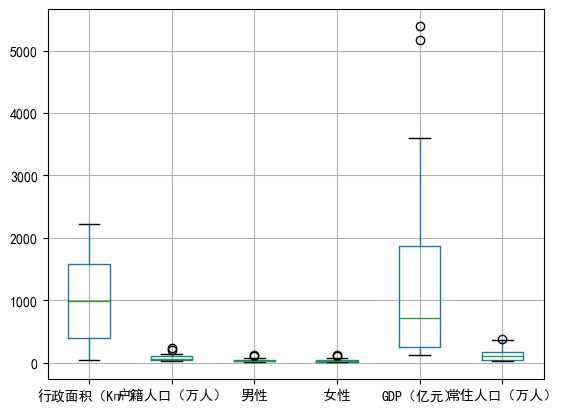

In [94]:
# 对北京地区信息进行异常值检测
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
file_data_bjinfo.boxplot(column=['行政面积（K㎡）','户籍人口（万人）','男性','女性','GDP（亿元）','常住人口（万人）'])
plt.show()

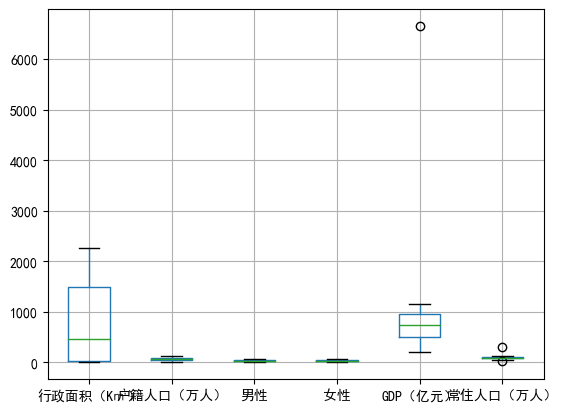

In [95]:
# 对天津地区信息进行异常值检测
file_data_tjinfo.boxplot(column=['行政面积（K㎡）','户籍人口（万人）','男性','女性','GDP（亿元）','常住人口（万人）'])
plt.show()

In [96]:
# 对两地信息数据进行合并
pd.concat([file_data_bjinfo,file_data_tjinfo],ignore_index=True)

,省级单位,地级单位,县级单位,区划类型,行政面积（K㎡）,户籍人口（万人）,男性,女性,GDP（亿元）,常住人口（万人）
0,北京,北京,西城区,市辖区,51,146.47,72.88,73.59,3602.36,125.90
1,北京,北京,东城区,市辖区,42,97.41,47.91,49.50,2061.80,87.80
2,北京,北京,丰台区,市辖区,306,115.33,58.39,56.95,1297.03,225.50
3,北京,北京,朝阳区,市辖区,455,210.91,105.43,105.48,5171.03,385.60
4,北京,北京,房山区,市辖区,1990,81.28,40.76,40.52,606.61,109.60
5,北京,北京,石景山区,市辖区,84,38.69,19.87,18.82,482.14,63.40
6,北京,北京,海淀区,市辖区,431,240.20,120.08,120.12,5395.16,359.30
7,北京,北京,通州区,市辖区,906,74.68,37.08,37.60,674.81,142.80
8,北京,北京,顺义区,市辖区,1020,62.74,31.12,31.61,1591.60,107.50
9,北京,北京,昌平区,市辖区,1344,61.14,30.72,30.41,753.39,201.00
